# Free Energy and Legendre Transforms

## Learning Goals:

After this material, you should be able to:

1. Define a spontaneous process in terms of free energy change of the system
2. Compute the Helmholtz Free Energy given internal energy, entropy and temperature
3. Compute the Gibbs Free Energy given enthalpy, entropy and temperature
4. Define a Legendre Transform
5. Identify the "natural variables" of each of the four Thermodynamic Energy Functions

## Coding Concepts:

The following coding concepts are used in this notebook:

The following coding concepts are used in this notebook

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Free Energy

We are pursuing Thermodynamics to see what it can tell us about biochemical/biomedical processes.  So far, we have determined that energy cannot be created or destroyed (First Law), spontaneous processes produce extractable work, reversible processes produce maximal extractable work, and that a spontaneous process has $\Delta S_{univ}>0$ (Second Law).  

Spontaneous processes are important and thus predicting whether a process will be spontaneous or not seems important.  But, currently the only way we have to do that is to compute $\Delta S_{univ}$ which seems challenging.

### Example: Using $\Delta S_{univ}$ to predict spontaneity

1 mole of ice is placed in a room at $5^\circ$ C and 1 atm pressure.  Is the melting of ice spontaneous under these conditions?  Given that $\Delta H_{fusion} = 6.01$ kJ/mol for ice at $0^\circ$ C, use the change in entropy to support your answer.

Yes, the melting of ice under these conditions is spontaneous.  We know that because we have observed it (or something very similar).  Let's compute the entropy of universe for this process:

$\Delta S_{univ} = \Delta S_{ice} + \Delta S_{room}$

\begin{align}
\Delta S_{ice} =& \frac{q_{ice}}{T_{ice}} \\
=&\frac{\Delta H_{fusion}}{T_{fusion}} \\
=& \frac{1 mol \quad 6.01 kJ/mol}{273.15K} \\
=& 0.0220 \quad kJ/K
\end{align}

\begin{align}
\Delta S_{room} =& \frac{-q_{ice}}{T_{room}} \\
=&\frac{-6.01}{278.15K} \\
=&-0.0216 \quad kJ/K
\end{align}

\begin{align}
\Delta S_{univ} = 22.0 J/K - 21.6 J/K = 0.4 J/K > 0
\end{align}

In [1]:
import numpy as np
np.round(6.01e3/273.15 - 6.01e3/278.15,1)

0.4

<div class="alert alert-block alert-info">
<b>Example:</b> Is the melting of ice spontaneous at -5$^\circ$ C?
</div>

### Helmholtz Free Energy

Having to compute $\Delta S_{univ}$ is cumbersome.  We would like to be able to predict spontaneity from a property of the system alone (not the surroundings).  This is what Free Energies allow us to do.  

It turns out that the Second Law dictates the existence of two additional state functions ($A$ and $G$) that can be used to predict spontaneity under certain conditions.  I will show, here, that this is the case for $A$.

We start with the differential form of the internal energy:

\begin{align}
dU_{sys} = \delta q_{sys} + \delta w_{sys}
\end{align}

For a system with only $PV$ work and under ***constant volume*** conditions, we have $\delta w_{sys} = 0$.  Thus:

\begin{align}
dU_{sys} =& \delta q_{sys} \leq T_{sys}dS_{sys}
\end{align}

where the last inequality is a statement of the Second Law; equality holds only for a reversible process. Subtracting $T_{sys}dS_{sys}$ from both sides of the inequality yields

\begin{align}
dU_{sys} - T_{sys}dS_{sys} &\leq 0 
\end{align}

Under ***constant temperature*** conditions, we can write the left hand side of the above inequality as a single differential

\begin{align}
d(U_{sys}-T_{sys}S_{sys}) &\leq 0
\end{align}


\begin{align}
A_{sys} \equiv U_{sys} - T_{sys}S_{sys}
\end{align}

$dA_{sys} \leq 0$ under constant volume and temperature conditions means that $\Delta A_{sys}<0$ for a spontaneous process under these conditions.

### Gibbs Free Energy

A similar derivation can be done for constant pressure and constant temperature conditions.  You arrive at the Gibbs Free energy defined as

\begin{align}
G_{sys} \equiv& H_{sys} - T_{sys}S_{sys} \\
=& A_{sys} + P_{sys}V_{sys} \\
=& U_{sys} + P_{sys}V_{sys} -  T_{sys}S_{sys}
\end{align}

$dG_{sys} \leq 0$ under constant pressure and temperature conditions means that $\Delta G_{sys}<0$ for a spontaneous process under these conditions.

## Thermodynamic Energy Functions

We have now encountered four Thermodynamic Energy Functions: $U$, $H$, $A$, and $G$.  The each contain the same information but some are more useful than others under certain conditions.  For example, $\Delta A$ tells us whether a process is spontaneous under constant $V$ and $T$ conditions and $\Delta G$ tells us whether a process is spontaneous under constant $P$ and $T$ conditions.  This leads to the following table summary:


| Energy Function                    | Definition                    | Differential Form                | Natural Variables |         
| :--------------------------------- | :--------------------------------------------------- | :--------------------------------------------------- | :--------------------------------- | 
| U - Internal Energy                | $\Delta U = q + w $           | $dU=TdS-PdV$                 | $S$ and $V$|
| H - Enthalpy                       | $H = U + PV$                  | $dH = TdS + VdP$                 | $S$ and $P$|
| A - Helmholtz Free Energy          | $A = U - TS$                  | $dA = -SdT - PdV$                | $T$ and $V$|
| G - Gibbs Free Energy              | $G = H - TS$                  | $dG = -SdT + VdP$                | $T$ and $P$|

### Thermodynamic Square

The Thermodynamic square is a tool used to remember the equations for and natural variables of the four Thermodynamic energy functions.

<img src="thermo_square.png" width="300" align="center">

## Legendre Transforms

These functions are all related to each other via a mathematical manipulation called a Legendre transform.  This transform creates a new function (e.g. enthalpy) from an original function (e.g. internal energy) by swapping a pair of conjugate variables (e.g. $P$ and $V$).  The resulting function contains all of the information of the previous function it is just a new function with a new independent variable.  

### Graphical Interpretation

In [2]:
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
%matplotlib notebook

def x_t(t,a):
    return 1/2*a*t**2
def s_t(t,a):
    return a*t
def g_s(s,a):
    return s*s/a-x_t(s/a,a)
def g_t(t,t1,a):
    return s_t(t1,a)*(t-t1)+x_t(t1,a)

def make_legendre_transform_interactive_plot():
    t0=1.5
    a = 2
    t = np.arange(0,4,0.01)
    s = np.arange(0,s_t(4,a),0.01)

    fig = plt.figure(figsize=(12,6), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    plt.tick_params(axis='both',labelsize=16)
    ax2 = plt.subplot(122)
    ax1.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax2.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax1.set_xlabel("t",size=16)
    ax1.set_ylabel("x",size=16)
    plt.tick_params(axis='both',labelsize=16)
    ax2.set_xlabel("s",size=16)
    ax2.set_ylabel("G",size=16)
    ax2.plot(s,g_s(s,a),c="g",lw=2)
    ax2.plot(s,np.zeros(s.size),"--",c="k")
    ax1.plot(t,np.zeros(t.size),"--",c="k")
    ax1.plot(t,x_t(t,a),lw=2)
    line1, = ax1.plot(t,g_t(t,t0,a),lw=2)
    line2, = ax1.plot(t,g_t(0,t0,a)*np.ones(t.size),"--",c="k")
    line3, = ax1.plot(np.arange(t0,t0+0.5,0.01),x_t(t0,a)*np.ones(np.arange(t0,t0+0.5,0.01).size),"--",c="k")
    #plt.text(0,0.5*g_t(0,t0,1),"G(s)",color="green",fontsize=16)
    gsText = ax1.annotate("G(s)",xy=(0,0.5*g_t(0,t0,a)),color="green",fontsize=16)
    annotation1 = ax1.annotate("", xy=(0, g_t(0,t0,a)), xytext=(0,x_t(0,a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'green'})
    stText = ax1.annotate("st", xy=(t0,-2.5),color="purple",fontsize=16)
    annotation2 = ax1.annotate("", xy=(t0, g_t(0,t0,a)), xytext=(t0,x_t(t0,a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'purple'})
    annotation3 = ax1.annotate("", xy=(t0+0.5, g_t(0,t0,a)), xytext=(t0+0.5,0),arrowprops={'arrowstyle':"<->",'lw': 1, 'color': 'green'})
    annotation4 = ax1.annotate("", xy=(t0+0.5, 0), xytext=(t0+0.5,x_t(t0,a)),arrowprops={'arrowstyle':"<->",'lw': 1, 'color': 'tab:blue'})
    annotation10 = ax1.annotate("x(t)", xy=(t0+0.1, 0.5*x_t(t0,a)), color="tab:blue",fontsize=16)
    annotation11 = ax1.annotate("G(s)", xy=(t0+0.1, 0.5*g_t(0,t0,a)), color="green",fontsize=16)
    annotation12 = ax1.annotate("t", xy=(0.5*t0, g_t(0,t0,a)-8.0), color="black",fontsize=16)
    annotation5 = ax1.annotate("", xy=(0,g_t(0,t0,a)-0.5), xytext=(x_t(t0,a),g_t(0,t0,a)-0.5),arrowprops={'arrowstyle':"<->",'lw': 1, 'color': 'black'})
    annotation6 = ax2.annotate("G(s)", xy=(s_t(t0,a), g_s(s_t(t0,a),a)), color="green",fontsize=16)
    annotation7 = ax2.annotate("", xy=(s_t(t0,a),0), xytext=(s_t(t0,a),g_s(s_t(t0,a),a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'green'})
    annotation8 = ax2.annotate("", xy=(0,g_s(s_t(t0,a),a)), xytext=(s_t(t0,a),g_s(s_t(t0,a),a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'tab:orange'})
    annotation9 = ax2.annotate("s", xy=(s_t(t0,a)*0.5, g_s(s_t(t0,a),a)+0.5), color="tab:orange",fontsize=16)
    ax1.set_xlim(0,4)
    ax1.set_ylim(g_t(0,4,a),x_t(4,a))
    ax2.set_xlim(0,s_t(4,a))
    ax2.set_ylim(0,g_s(s_t(4,a),a))
    def update(t0 = 2.5):
        line1.set_ydata(g_t(t,t0,a))
        annotation1.xy = (0, g_t(0,t0,a))
        annotation1.set_position((0,x_t(0,a)))
        gsText.set_position((0+0.05,0.5*g_t(0,t0,a)))
        annotation2.xy = (t0,x_t(t0,a))
        annotation2.set_position((t0, g_t(0,t0,a)))
        annotation3.xy = (t0+0.5, g_t(0,t0,a))
        annotation3.set_position((t0+0.5,0))
        annotation4.xy = (t0+0.5, 0)
        annotation4.set_position((t0+0.5,x_t(t0,a)))
        annotation5.xy = (0,g_t(0,t0,a)-0.5)
        annotation5.set_position((t0,g_t(0,t0,a)-0.5))
        stText.set_position((t0-0.3,-2.5))
        #annotation1.xytext=(t0, g_t(0,t0,1))
        line2.set_ydata(g_t(0,t0,a)*np.ones(t.size))
        line3.set_xdata(np.arange(t0,t0+0.5,0.01))
        line3.set_ydata(x_t(t0,a)*np.ones(np.arange(t0,t0+0.5,0.01).size))
        # Gs
        annotation6.set_position((s_t(t0,a)+0.5, 0.5*g_s(s_t(t0,a),a)))
        annotation7.xy = (s_t(t0,a), 0)
        annotation7.set_position((s_t(t0,a), g_s(s_t(t0,a),a)))
        annotation8.xy = (0, g_s(s_t(t0,a),a))
        annotation8.set_position((s_t(t0,a), g_s(s_t(t0,a),a)))
        annotation9.set_position((s_t(t0,a)*0.5, g_s(s_t(t0,a),a)+0.5))
        annotation10.set_position((t0+0.1, 0.5*x_t(t0,a)))
        annotation11.set_position((t0+0.1, 0.5*g_t(0,t0,a)))
        annotation12.set_position((0.5*t0, g_t(0,t0,a)-4.0))
        fig.canvas.draw_idle()
    interact(update,t0=(0.0,4.0));

In [3]:
make_legendre_transform_interactive_plot()

<IPython.core.display.Javascript object>

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_33083/1765388681.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_33083/1765388681.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


interactive(children=(FloatSlider(value=2.5, description='t0', max=4.0), Output()), _dom_classes=('widget-inte…

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_33083/3898380107.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_33083/3898380107.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


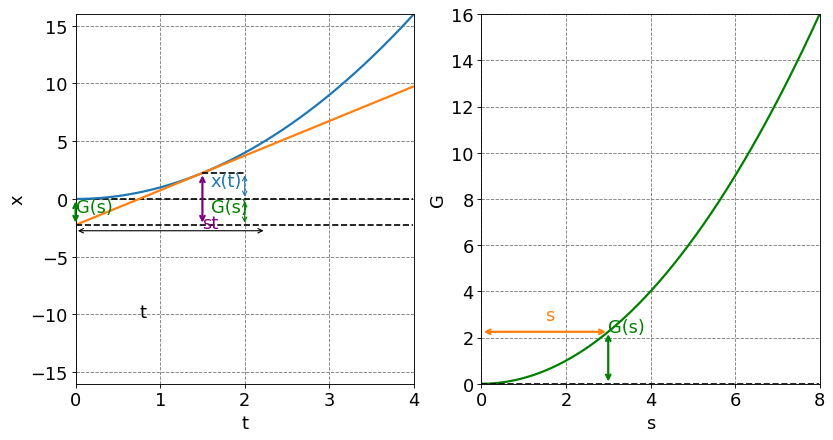

interactive(children=(FloatSlider(value=2.5, description='t0', max=4.0), Output()), _dom_classes=('widget-inte…

In [4]:
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
%matplotlib inline

def x_t(t,a):
    return 1/2*a*t**2
def s_t(t,a):
    return a*t
def g_s(s,a):
    return s*s/a-x_t(s/a,a)
def g_t(t,t1,a):
    return s_t(t1,a)*(t-t1)+x_t(t1,a)

def make_legendre_transform_plot():
    t0=1.5
    a = 2
    t = np.arange(0,4,0.01)
    s = np.arange(0,s_t(4,a),0.01)

    fig = plt.figure(figsize=(12,6), dpi= 80, facecolor='w', edgecolor='k')
    ax1 = plt.subplot(121)
    plt.tick_params(axis='both',labelsize=16)
    ax2 = plt.subplot(122)
    ax1.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax2.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax1.set_xlabel("t",size=16)
    ax1.set_ylabel("x",size=16)
    plt.tick_params(axis='both',labelsize=16)
    ax2.set_xlabel("s",size=16)
    ax2.set_ylabel("G",size=16)
    ax2.plot(s,g_s(s,a),c="g",lw=2)
    ax2.plot(s,np.zeros(s.size),"--",c="k")
    ax1.plot(t,np.zeros(t.size),"--",c="k")
    ax1.plot(t,x_t(t,a),lw=2)
    line1, = ax1.plot(t,g_t(t,t0,a),lw=2)
    line2, = ax1.plot(t,g_t(0,t0,a)*np.ones(t.size),"--",c="k")
    line3, = ax1.plot(np.arange(t0,t0+0.5,0.01),x_t(t0,a)*np.ones(np.arange(t0,t0+0.5,0.01).size),"--",c="k")
    #plt.text(0,0.5*g_t(0,t0,1),"G(s)",color="green",fontsize=16)
    gsText = ax1.annotate("G(s)",xy=(0,0.5*g_t(0,t0,a)),color="green",fontsize=16)
    annotation1 = ax1.annotate("", xy=(0, g_t(0,t0,a)), xytext=(0,x_t(0,a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'green'})
    stText = ax1.annotate("st", xy=(t0,-2.5),color="purple",fontsize=16)
    annotation2 = ax1.annotate("", xy=(t0, g_t(0,t0,a)), xytext=(t0,x_t(t0,a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'purple'})
    annotation3 = ax1.annotate("", xy=(t0+0.5, g_t(0,t0,a)), xytext=(t0+0.5,0),arrowprops={'arrowstyle':"<->",'lw': 1, 'color': 'green'})
    annotation4 = ax1.annotate("", xy=(t0+0.5, 0), xytext=(t0+0.5,x_t(t0,a)),arrowprops={'arrowstyle':"<->",'lw': 1, 'color': 'tab:blue'})
    annotation10 = ax1.annotate("x(t)", xy=(t0+0.1, 0.5*x_t(t0,a)), color="tab:blue",fontsize=16)
    annotation11 = ax1.annotate("G(s)", xy=(t0+0.1, 0.5*g_t(0,t0,a)), color="green",fontsize=16)
    annotation12 = ax1.annotate("t", xy=(0.5*t0, g_t(0,t0,a)-8.0), color="black",fontsize=16)
    annotation5 = ax1.annotate("", xy=(0,g_t(0,t0,a)-0.5), xytext=(x_t(t0,a),g_t(0,t0,a)-0.5),arrowprops={'arrowstyle':"<->",'lw': 1, 'color': 'black'})
    annotation6 = ax2.annotate("G(s)", xy=(s_t(t0,a), g_s(s_t(t0,a),a)), color="green",fontsize=16)
    annotation7 = ax2.annotate("", xy=(s_t(t0,a),0), xytext=(s_t(t0,a),g_s(s_t(t0,a),a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'green'})
    annotation8 = ax2.annotate("", xy=(0,g_s(s_t(t0,a),a)), xytext=(s_t(t0,a),g_s(s_t(t0,a),a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'tab:orange'})
    annotation9 = ax2.annotate("s", xy=(s_t(t0,a)*0.5, g_s(s_t(t0,a),a)+0.5), color="tab:orange",fontsize=16)
    ax1.set_xlim(0,4)
    ax1.set_ylim(g_t(0,4,a),x_t(4,a))
    ax2.set_xlim(0,s_t(4,a))
    ax2.set_ylim(0,g_s(s_t(4,a),a))
    def update(t0 = 2.5):
        line1.set_ydata(g_t(t,t0,a))
        annotation1.xy = (0, g_t(0,t0,a))
        annotation1.set_position((0,x_t(0,a)))
        gsText.set_position((0+0.05,0.5*g_t(0,t0,a)))
        annotation2.xy = (t0,x_t(t0,a))
        annotation2.set_position((t0, g_t(0,t0,a)))
        annotation3.xy = (t0+0.5, g_t(0,t0,a))
        annotation3.set_position((t0+0.5,0))
        annotation4.xy = (t0+0.5, 0)
        annotation4.set_position((t0+0.5,x_t(t0,a)))
        annotation5.xy = (0,g_t(0,t0,a)-0.5)
        annotation5.set_position((t0,g_t(0,t0,a)-0.5))
        stText.set_position((t0-0.3,-2.5))
        #annotation1.xytext=(t0, g_t(0,t0,1))
        line2.set_ydata(g_t(0,t0,a)*np.ones(t.size))
        line3.set_xdata(np.arange(t0,t0+0.5,0.01))
        line3.set_ydata(x_t(t0,a)*np.ones(np.arange(t0,t0+0.5,0.01).size))
        # Gs
        annotation6.set_position((s_t(t0,a)+0.5, 0.5*g_s(s_t(t0,a),a)))
        annotation7.xy = (s_t(t0,a), 0)
        annotation7.set_position((s_t(t0,a), g_s(s_t(t0,a),a)))
        annotation8.xy = (0, g_s(s_t(t0,a),a))
        annotation8.set_position((s_t(t0,a), g_s(s_t(t0,a),a)))
        annotation9.set_position((s_t(t0,a)*0.5, g_s(s_t(t0,a),a)+0.5))
        annotation10.set_position((t0+0.1, 0.5*x_t(t0,a)))
        annotation11.set_position((t0+0.1, 0.5*g_t(0,t0,a)))
        annotation12.set_position((0.5*t0, g_t(0,t0,a)-4.0))
        fig.canvas.draw_idle()
    interact(update,t0=(0.0,4.0));
make_legendre_transform_plot()